In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
import datetime as dt


In [2]:
#input_file ="Energy_2020_03_13_03_55_PM.csv"
out_filename = "processed_energy.csv"

In [3]:
data = pd.read_csv(out_filename, sep=",", error_bad_lines=False)

In [4]:
#data 
from IPython.display import display
pd.options.display.max_columns = None
display(data)

,Unnamed: 0,NodeName,Arch,CoresPerSocket,CPUAlloc,CPUErr,CPUTot,CPULoad,AvailableFeatures,ActiveFeatures,Gres,NodeAddr,NodeHostName,Version,OS,RealMemory,AllocMem,FreeMem,Sockets,Boards,State,ThreadsPerCore,TmpDisk,Weight,Owner,MCS_label,Partitions,BootTime,SlurmdStartTime,CfgTRES,AllocTRES,CapWatts,CurrentWatts,LowestJoules,ConsumedJoules,ExtSensorsJoules,ExtSensorsWatts,ExtSensorsTemp
0,0,gpu01,x86_64,10,0,0,20,0.01,"128gb,broadwell-ep,e5-2640v4","128gb,broadwell-ep,e5-2640v4",gpu:gp100:2,gpu01,gpu01,17.02,Linux,128647,0,126873,2,1,IDLE,1,9951,1,NaN,NaN,gpu,2020-03-06T11:20:07,2020-03-06T14:56:42,"cpu=20,mem=128647M,gres/gpu=2",NaN,NaN,26,327905,14455238,n/s,0,n/s
1,1,gpu02,x86_64,8,0,0,16,0.01,"32gb,sandybridge-ep,e5-2665","32gb,sandybridge-ep,e5-2665",gpu:k40c:2,gpu02,gpu02,17.02,Linux,31978,0,30881,2,1,IDLE,1,9951,1,NaN,NaN,gpu,2020-03-06T11:19:50,2020-03-06T14:56:44,"cpu=16,mem=31978M,gres/gpu=2",NaN,NaN,36,89486,22178750,n/s,0,n/s
2,4,node01,x86_64,1,40,0,40,18.01,"omnipart,128gb,broadwell-ep,e5-2640v4","omnipart,128gb,broadwell-ep,e5-2640v4",(null),node01,node01,17.02,Linux,128655,0,122084,40,1,ALLOCATED,1,9951,1,rkhasseh(9917),NaN,cmsp,2019-10-17T10:18:37,2020-03-06T14:56:35,"cpu=40,mem=128655M",cpu=40,NaN,140,508775,97320117,n/s,0,n/s
3,5,node02,x86_64,1,40,0,40,18.06,"omnipart,128gb,broadwell-ep,e5-2640v4","omnipart,128gb,broadwell-ep,e5-2640v4",(null),node02,node02,17.02,Linux,128655,0,122145,40,1,ALLOCATED,1,9951,1,rkhasseh(9917),NaN,cmsp,2019-10-17T10:18:38,2020-03-06T14:56:35,"cpu=40,mem=128655M",cpu=40,NaN,133,348011,92215966,n/s,0,n/s
4,6,node03,x86_64,1,40,0,40,18.01,"omnipart,128gb,broadwell-ep,e5-2640v4","omnipart,128gb,broadwell-ep,e5-2640v4",(null),node03,node03,17.02,Linux,128655,0,123621,40,1,ALLOCATED,1,9951,1,rkhasseh(9917),NaN,cmsp,2019-10-17T14:20:53,2020-03-06T14:56:35,"cpu=40,mem=128655M",cpu=40,NaN,141,502728,96752409,n/s,0,n/s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,144,node183,x86_64,1,40,0,40,12.01,"omnipart,192,broadwell-ep,e5-2640v4","omnipart,192,broadwell-ep,e5-2640v4",(null),node183,node183,17.02,Linux,192960,0,182812,40,1,ALLOCATED,1,9951,1,nseriani(6623),NaN,cmsp,2019-10-17T14:52:02,2020-03-06T14:56:35,"cpu=40,mem=192960M",cpu=40,NaN,194,599478,91436006,n/s,0,n/s
137,145,node184,x86_64,1,0,0,40,0.01,"omnipart,192,broadwell-ep,e5-2640v4","omnipart,192,broadwell-ep,e5-2640v4",(null),node184,node184,17.02,Linux,192960,0,186766,40,1,IDLE,1,9951,1,NaN,NaN,cmsp,2019-10-17T14:52:02,2020-03-06T14:56:35,"cpu=40,mem=192960M",NaN,NaN,16,415349,86243392,n/s,0,n/s
138,146,serial01,x86_64,8,14,0,16,14.01,"32gb,sandybridge-ep,e5-2650","32gb,sandybridge-ep,e5-2650",(null),serial01,serial01,17.02,Linux,31955,0,24026,2,1,MIXED,1,9951,1,NaN,NaN,serial,2020-03-05T12:01:52,2020-03-06T14:56:41,"cpu=16,mem=31955M",cpu=14,NaN,90,99783,42151075,n/s,0,n/s
139,148,testing01,x86_64,8,16,0,16,8.00,"32gb,sandybridge-ep,e5-2650","32gb,sandybridge-ep,e5-2650",(null),testing01,testing01,17.02,Linux,31955,0,29855,2,1,ALLOCATED,1,9951,1,ltchibot(5994),NaN,testing,2020-03-06T09:27:25,2020-03-06T14:56:40,"cpu=16,mem=31955M",cpu=16,NaN,105,113153,39330559,n/s,0,n/s


In [5]:
#Compute time
# 2019-10-17T10:18:38
#starting_time = '2020-03-13 15:55'
a = dt.datetime.fromisoformat('2020-03-06T14:56:35')
starting_time = dt.datetime(2020, 3, 13, 15, 55)

def cal_time_diff(end, start = starting_time):
    return (start-end).total_seconds()

cal_time_diff(a)

608305.0

In [7]:
def add_time_to_df(list_ending_time):
    df = []
    for x in list_ending_time.to_numpy():
        df.append(cal_time_diff(dt.datetime.fromisoformat(x)))  
    return  pd.DataFrame(df, columns =['period'])

data['period'] = add_time_to_df(data['SlurmdStartTime'])
data

,Unnamed: 0,NodeName,Arch,CoresPerSocket,CPUAlloc,CPUErr,CPUTot,CPULoad,AvailableFeatures,ActiveFeatures,Gres,NodeAddr,NodeHostName,Version,OS,RealMemory,AllocMem,FreeMem,Sockets,Boards,State,ThreadsPerCore,TmpDisk,Weight,Owner,MCS_label,Partitions,BootTime,SlurmdStartTime,CfgTRES,AllocTRES,CapWatts,CurrentWatts,LowestJoules,ConsumedJoules,ExtSensorsJoules,ExtSensorsWatts,ExtSensorsTemp,period
0,0,gpu01,x86_64,10,0,0,20,0.01,"128gb,broadwell-ep,e5-2640v4","128gb,broadwell-ep,e5-2640v4",gpu:gp100:2,gpu01,gpu01,17.02,Linux,128647,0,126873,2,1,IDLE,1,9951,1,NaN,NaN,gpu,2020-03-06T11:20:07,2020-03-06T14:56:42,"cpu=20,mem=128647M,gres/gpu=2",NaN,NaN,26,327905,14455238,n/s,0,n/s,608298.0
1,1,gpu02,x86_64,8,0,0,16,0.01,"32gb,sandybridge-ep,e5-2665","32gb,sandybridge-ep,e5-2665",gpu:k40c:2,gpu02,gpu02,17.02,Linux,31978,0,30881,2,1,IDLE,1,9951,1,NaN,NaN,gpu,2020-03-06T11:19:50,2020-03-06T14:56:44,"cpu=16,mem=31978M,gres/gpu=2",NaN,NaN,36,89486,22178750,n/s,0,n/s,608296.0
2,4,node01,x86_64,1,40,0,40,18.01,"omnipart,128gb,broadwell-ep,e5-2640v4","omnipart,128gb,broadwell-ep,e5-2640v4",(null),node01,node01,17.02,Linux,128655,0,122084,40,1,ALLOCATED,1,9951,1,rkhasseh(9917),NaN,cmsp,2019-10-17T10:18:37,2020-03-06T14:56:35,"cpu=40,mem=128655M",cpu=40,NaN,140,508775,97320117,n/s,0,n/s,608305.0
3,5,node02,x86_64,1,40,0,40,18.06,"omnipart,128gb,broadwell-ep,e5-2640v4","omnipart,128gb,broadwell-ep,e5-2640v4",(null),node02,node02,17.02,Linux,128655,0,122145,40,1,ALLOCATED,1,9951,1,rkhasseh(9917),NaN,cmsp,2019-10-17T10:18:38,2020-03-06T14:56:35,"cpu=40,mem=128655M",cpu=40,NaN,133,348011,92215966,n/s,0,n/s,608305.0
4,6,node03,x86_64,1,40,0,40,18.01,"omnipart,128gb,broadwell-ep,e5-2640v4","omnipart,128gb,broadwell-ep,e5-2640v4",(null),node03,node03,17.02,Linux,128655,0,123621,40,1,ALLOCATED,1,9951,1,rkhasseh(9917),NaN,cmsp,2019-10-17T14:20:53,2020-03-06T14:56:35,"cpu=40,mem=128655M",cpu=40,NaN,141,502728,96752409,n/s,0,n/s,608305.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,144,node183,x86_64,1,40,0,40,12.01,"omnipart,192,broadwell-ep,e5-2640v4","omnipart,192,broadwell-ep,e5-2640v4",(null),node183,node183,17.02,Linux,192960,0,182812,40,1,ALLOCATED,1,9951,1,nseriani(6623),NaN,cmsp,2019-10-17T14:52:02,2020-03-06T14:56:35,"cpu=40,mem=192960M",cpu=40,NaN,194,599478,91436006,n/s,0,n/s,608305.0
137,145,node184,x86_64,1,0,0,40,0.01,"omnipart,192,broadwell-ep,e5-2640v4","omnipart,192,broadwell-ep,e5-2640v4",(null),node184,node184,17.02,Linux,192960,0,186766,40,1,IDLE,1,9951,1,NaN,NaN,cmsp,2019-10-17T14:52:02,2020-03-06T14:56:35,"cpu=40,mem=192960M",NaN,NaN,16,415349,86243392,n/s,0,n/s,608305.0
138,146,serial01,x86_64,8,14,0,16,14.01,"32gb,sandybridge-ep,e5-2650","32gb,sandybridge-ep,e5-2650",(null),serial01,serial01,17.02,Linux,31955,0,24026,2,1,MIXED,1,9951,1,NaN,NaN,serial,2020-03-05T12:01:52,2020-03-06T14:56:41,"cpu=16,mem=31955M",cpu=14,NaN,90,99783,42151075,n/s,0,n/s,608299.0
139,148,testing01,x86_64,8,16,0,16,8.00,"32gb,sandybridge-ep,e5-2650","32gb,sandybridge-ep,e5-2650",(null),testing01,testing01,17.02,Linux,31955,0,29855,2,1,ALLOCATED,1,9951,1,ltchibot(5994),NaN,testing,2020-03-06T09:27:25,2020-03-06T14:56:40,"cpu=16,mem=31955M",cpu=16,NaN,105,113153,39330559,n/s,0,n/s,608300.0


In [ ]:
# add time in seconds 

In [8]:
# add power in wats 
data['power'] = data['ConsumedJoules'] / data['period']

In [9]:
# P = E/t

In [10]:
#create link between the available features to short hand
# omnipart,128gb,broadwell-ep,e5-2640v4  - o_128_b_264
# omnipart,192,broadwell-ep,e5-2640v - o_192_b_264
# infiniband,32gb,sandybridge-ep,e5-2620 - i_32_s_262
# infiniband,64gb,ivybridge-ep,e5-2680v2 - i_64_i_268
# 128gb,broadwell-ep,e5-2640v4 - 128_b_264
# 32gb,sandybridge-ep,e5-2665 - 32_s_2665
# infiniband,32gb,sandybridge-ep,e5-2650 - i_32_s_265
# infiniband,64gb,ivybridge-ep,e5-2680v2 - i_64_i_268
# 32gb,sandybridge-ep,e5-2650 - 32_s_265

data = data.replace(to_replace ="omnipart,128gb,broadwell-ep,e5-2640v4", value ="o_128_b_264", regex=True) 
data = data.replace(to_replace ="omnipart,192,broadwell-ep,e5-2640v", value ="o_192_b_264", regex=True) 
data = data.replace(to_replace ="infiniband,32gb,sandybridge-ep,e5-2620", value ="i_32_s_262", regex=True) 
data = data.replace(to_replace ="infiniband,64gb,ivybridge-ep,e5-2680v2", value ="i_64_i_268", regex=True) 
data = data.replace(to_replace ="128gb,broadwell-ep,e5-2640v4", value ="128_b_264", regex=True) 
data = data.replace(to_replace ="32gb,sandybridge-ep,e5-2665", value ="32_s_2665", regex=True)
data = data.replace(to_replace ="infiniband,32gb,sandybridge-ep,e5-2650", value ="i_32_s_265", regex=True)
data = data.replace(to_replace ="infiniband,64gb,ivybridge-ep,e5-2680v2", value ="i_64_i_268", regex=True)
data = data.replace(to_replace ="32gb,sandybridge-ep,e5-2650", value ="32_s_265", regex=True)


In [11]:
#get number of nodes of a certain type
df = data.AvailableFeatures.value_counts()
df

i_32_s_262      47
i_64_i_268      39
o_192_b_2644    24
o_128_b_264     16
i_32_s_265      10
32_s_265         3
32_s_2665        1
128_b_264        1
Name: AvailableFeatures, dtype: int64

In [12]:
#get number of nodes grouped by Parttiions 
data.groupby('Partitions')['AvailableFeatures'].value_counts()

Partitions  AvailableFeatures
cmsp        o_192_b_2644         24
            o_128_b_264          16
esp         i_32_s_262           35
esp1        i_64_i_268           26
gpu         128_b_264             1
            32_s_2665             1
long        i_64_i_268           13
            i_32_s_262           12
            i_32_s_265           10
serial      32_s_265              1
testing     32_s_265              2
Name: AvailableFeatures, dtype: int64

In [14]:
# Aggregate by partitition and features 
pf_pie_data = data.groupby(['Partitions', 'AvailableFeatures'])['power'].agg('sum')
pf_pie_data

Partitions  AvailableFeatures
cmsp        o_128_b_264          2368.762704
            o_192_b_2644         3736.650131
esp         i_32_s_262            782.923908
esp1        i_64_i_268           1553.406561
gpu         128_b_264              23.763415
            32_s_2665              36.460457
long        i_32_s_262            434.698860
            i_32_s_265            330.136759
            i_64_i_268           2274.167798
serial      32_s_265               69.293349
testing     32_s_265              125.493779
Name: power, dtype: float64

In [16]:
#Aggregate using agg per partition 
pie_data = data.groupby(['Partitions'])['power'].agg('sum')
pie_data

Partitions
cmsp       6105.412835
esp         782.923908
esp1       1553.406561
gpu          60.223872
long       3039.003417
serial       69.293349
testing     125.493779
Name: power, dtype: float64

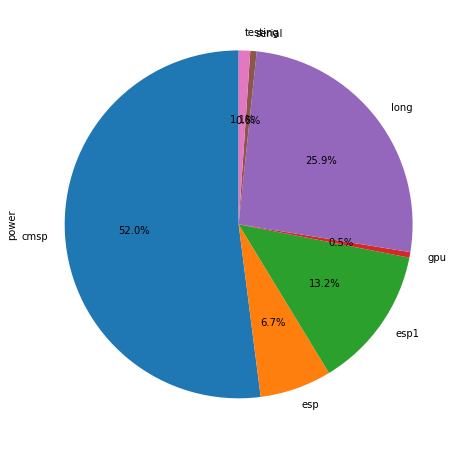

In [17]:
# Create enrgy pie_data 
plot1 = pie_data.plot.pie(subplots=True, autopct='%1.1f%%', startangle=90, figsize=(15, 8))

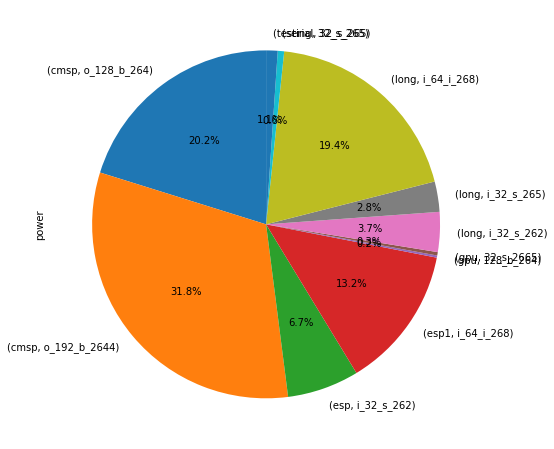

In [15]:
# Create enrgy pie_data 
plot = pf_pie_data.plot.pie(subplots=True, autopct='%1.1f%%', startangle=90, figsize=(15, 8))

,ConsumedJoules,LowestJoules
Partitions,,
cmsp,3713949383,21143112
esp,476253577,1924830
esp1,944937556,3261296
gpu,36633988,417391
long,1848630462,4401919
serial,42151075,99783
testing,76337866,219331


In [16]:
# Get the pandas series 
#pie_data
#type(pie_data)
#pie_data.index
#x = pie_data.to_numpy()
#x = x/1000000
#x

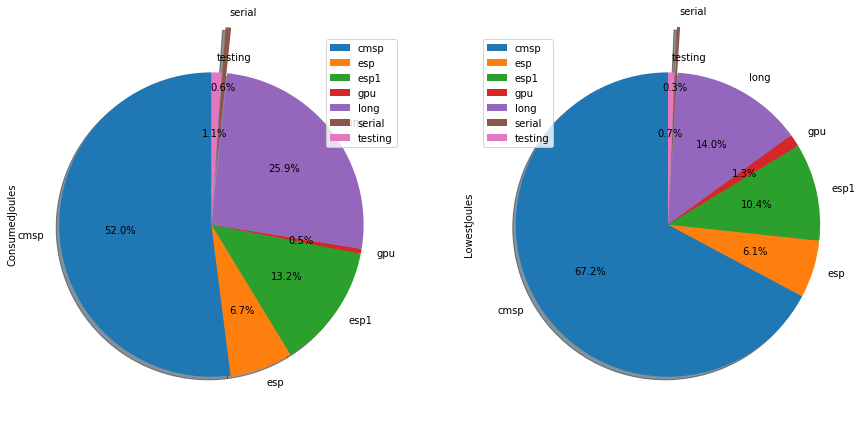

,ConsumedJoules,NodeName,LowestJoules,Partitions
0,14455238,gpu01,327905,gpu
1,22178750,gpu02,89486,gpu
4,97320117,node01,508775,cmsp
5,92215966,node02,348011,cmsp
6,96752409,node03,502728,cmsp
...,...,...,...,...
144,91436006,node183,599478,cmsp
145,86243392,node184,415349,cmsp
146,42151075,serial01,99783,serial
148,39330559,testing01,113153,testing


,ConsumedJoules,LowestJoules
count,1.410000e+02,141.000000
mean,5.063045e+07,223174.907801
std,3.736657e+07,217826.283953
min,1.165522e+07,10272.000000
25%,1.555680e+07,81566.000000
50%,3.145256e+07,128075.000000
75%,9.038793e+07,347885.000000
max,1.196861e+08,916748.000000


ConsumedJoules                                           7138893907
NodeName          gpu01gpu02node01node02node03node04node05node06...
LowestJoules                                               31467662
Partitions        gpugpucmspcmspcmspcmspcmspcmspcmspcmspcmspcmsp...
dtype: object

,ConsumedJoules,LowestJoules
AvailableFeatures,,
128_b_264,14455238,327905
32_s_265,118488941,319114
32_s_2665,22178750,89486
i_32_s_262,740683146,3436057
i_32_s_265,200823181,1214859
i_64_i_268,2328315268,4937129
o_128_b_264,1440926425,8533627
o_192_b_2644,2273022958,12609485


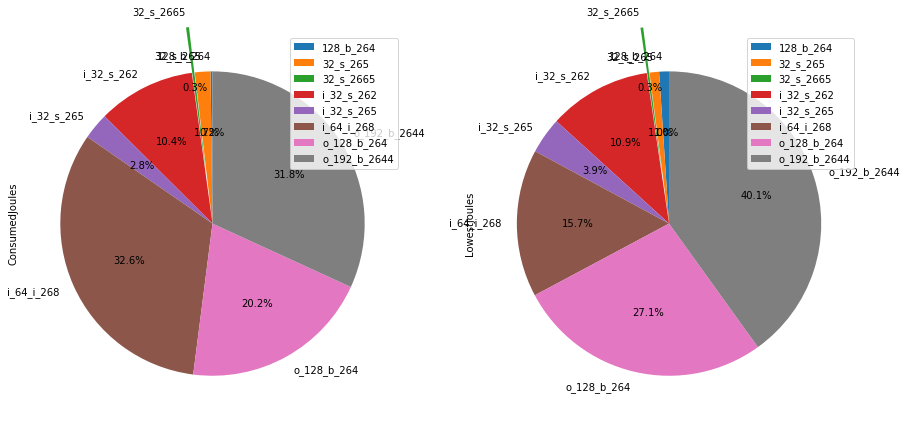

,ConsumedJoules,LowestJoules
count,4.000000e+01,40.000000
mean,9.284873e+07,528577.800000
std,7.168296e+06,171718.014154
min,8.275015e+07,158175.000000
25%,8.765353e+07,388712.500000
50%,9.221436e+07,505751.500000
75%,9.689434e+07,645910.000000
max,1.100139e+08,916748.000000


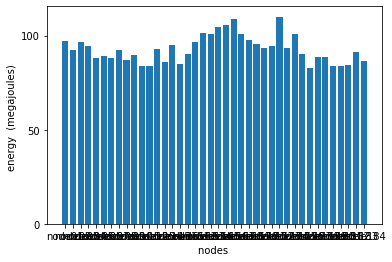

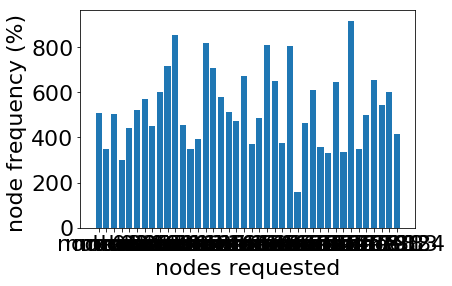